<a href="https://colab.research.google.com/github/SinisterXI/CS-351L---AI-Lab-GitHub-Repository_2022428/blob/main/Shameer_CS351L_Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Heuristic Assignments: [('Worker 1', 'Task 2'), ('Worker 2', 'Task 3'), ('Worker 3', 'Task 1')]
Total Cost: 8


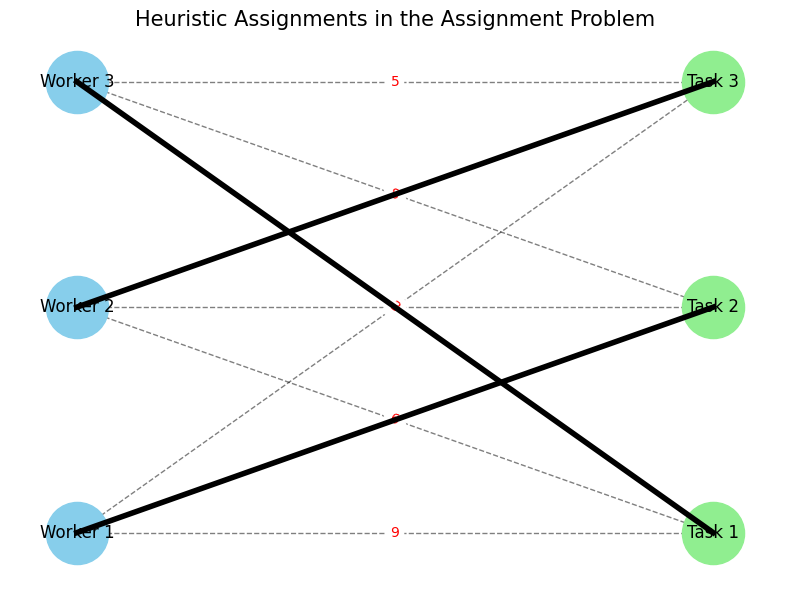

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Initialize the graph and define vertices and edges
G = nx.Graph()

# Define workers and tasks
workers = ['Worker 1', 'Worker 2', 'Worker 3']
tasks = ['Task 1', 'Task 2', 'Task 3']

# Add nodes for workers and tasks
G.add_nodes_from(workers)
G.add_nodes_from(tasks)

# Define the cost matrix
cost_matrix = [
    [9, 2, 7],
    [6, 4, 3],
    [3, 8, 5]
]

# Add edges with weights (costs)
for i, worker in enumerate(workers):
    for j, task in enumerate(tasks):
        G.add_edge(worker, task, weight=cost_matrix[i][j])

# Step 2: Implement the Greedy Heuristic Algorithm
def greedy_heuristic(cost):
    n = len(cost)
    assigned_workers = set()
    assigned_tasks = set()
    assignments = []
    total_cost = 0

    # Create a list of all possible (worker, task) pairs sorted by cost
    possible_assignments = [(i, j, cost[i][j]) for i in range(n) for j in range(n)]
    possible_assignments.sort(key=lambda x: x[2])  # Sort by cost (ascending)

    for i, j, c in possible_assignments:
        if i not in assigned_workers and j not in assigned_tasks:
            # Assign this worker to the task
            assignments.append((i, j))
            total_cost += c
            assigned_workers.add(i)
            assigned_tasks.add(j)
        if len(assigned_workers) == n and len(assigned_tasks) == n:
            break

    return assignments, total_cost

# Find the optimal assignments using the greedy heuristic
assignments, total_cost = greedy_heuristic(cost_matrix)

# Create a list of assignments (worker, task) using their names
assignment_pairs = [(workers[i], tasks[j]) for i, j in assignments]

# Output results
print("Heuristic Assignments:", assignment_pairs)
print("Total Cost:", total_cost)

# Step 3: Visualize the graph using matplotlib
plt.figure(figsize=(8, 6))

# Set the positions of the nodes using bipartite layout for better clarity
pos = nx.bipartite_layout(G, workers)

# Draw the nodes with different colors for workers and tasks
nx.draw_networkx_nodes(G, pos, nodelist=workers, node_size=2000, node_color='skyblue', label='Workers')
nx.draw_networkx_nodes(G, pos, nodelist=tasks, node_size=2000, node_color='lightgreen', label='Tasks')

# Draw all edges with dashed lines to show potential assignments
nx.draw_networkx_edges(G, pos, width=1, style='dashed', alpha=0.5)

# Highlight the optimal assignments with bold black lines
for i, j in assignments:
    plt.plot([pos[workers[i]][0], pos[tasks[j]][0]], [pos[workers[i]][1], pos[tasks[j]][1]], color='black', linewidth=4)

# Draw the labels for workers and tasks
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

# Draw edge labels for weights (costs) for all edges
edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)

# Title and display
plt.title("Heuristic Assignments in the Assignment Problem", fontsize=15)
plt.axis('off')  # Hide axes
plt.tight_layout()
plt.show()
